# Gradient Descent for Polynomial Regression
`SepalLengthCm` as the input and `PetalLengthCm` as the output, and apply gradient descent to minimize the error.

> Name : Debatreya Das<br>
> Roll No. 12212070<br>
> CS-A4<br>
> ML-LAB 8<br>

### Importing Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Dataset

In [3]:
# Load the Iris dataset
df = pd.read_csv('./iris.csv')

# Display the first few rows to understand the structure
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Pre-process the Data

In [4]:
# Select input (X) and output (y)
X = df['SepalLengthCm'].values.reshape(-1, 1)
y = df['PetalLengthCm'].values.reshape(-1, 1)

# Function to normalize data (feature scaling)
def normalize_features(X):
    return (X - np.mean(X)) / np.std(X)

# Normalize the features
X_normalized = normalize_features(X)

### Generate Polynomial Features

In [5]:
# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    X_poly = np.ones((X.shape[0], 1))
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X**d))
    return X_poly

degree = 2 # Bias ca be changed to adjust the overfitting and underfitting.
X_poly = generate_polynomial_features(X_normalized, degree)
X_poly[:5]

array([[ 1.        , -0.90068117,  0.81122657],
       [ 1.        , -1.14301691,  1.30648766],
       [ 1.        , -1.38535265,  1.91920197],
       [ 1.        , -1.50652052,  2.26960408],
       [ 1.        , -1.02184904,  1.04417546]])

### Initialize the parameters of gradient Descent

In [6]:
# Initialize theta (weights) to zeros
theta = np.zeros((X_poly.shape[1], 1))

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

### GRADIENT DESCENT IMPLEMENTATION

In [7]:
# Function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        # Prediction using the current theta values
        y_pred = X.dot(theta)
        
        # Compute the gradient
        gradient = (1/m) * X.T.dot(y_pred - y)
        
        # Update theta values
        theta = theta - learning_rate * gradient
        
        # Compute the cost and save it for analysis
        cost = (1/(2*m)) * np.sum((y_pred - y)**2)
        cost_history.append(cost)
        
    return theta, cost_history

# Perform gradient descent
theta_optimized, cost_history = gradient_descent(X_poly, y, theta, learning_rate, iterations)

### Displaying Optimized Theta Values

In [8]:
theta_optimized

array([[ 3.92260186],
       [ 1.58409683],
       [-0.18054523]])

### Visualize Cost history
This plot shows how the cost decreases over iterations, indicating that the gradient descent algorithm is learning.

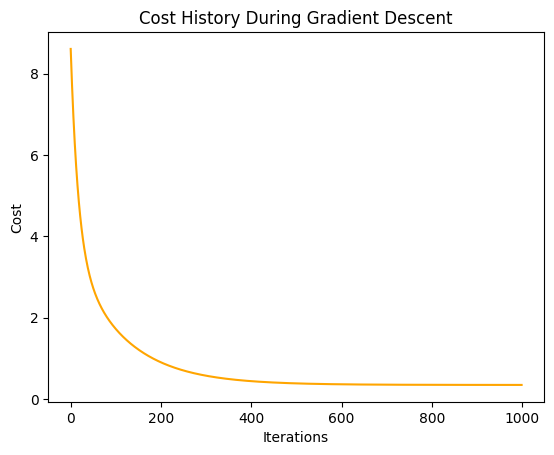

In [10]:
# Plot cost history to see how the cost decreases
plt.plot(range(iterations), cost_history, color='orange')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History During Gradient Descent')
plt.show()

### Make Predictions and Visualize the fit
This plot shows the actual data points and the predicted values using the polynomial regression model learned through gradient descent.

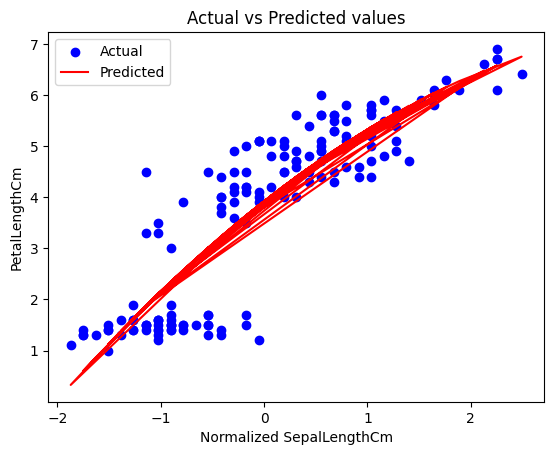

In [11]:
# Predict values using the optimized theta
y_pred = X_poly.dot(theta_optimized)

# Plot actual vs predicted values
plt.scatter(X_normalized, y, color='blue', label='Actual')
plt.plot(X_normalized, y_pred, color='red', label='Predicted')
plt.xlabel('Normalized SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()